### Matplotlib

- Knihovna pro vizualizaci s možností nastavení parametrů na nízké úrovni.
- Vizualizace je možná v různých formátech (PNG, PDF, SVG, ...).
- Vizualizace je možná v různých prostředích (notebook, GUI, web, ...).
- Většina nástrojů pro vizualizaci je dostupná v podmodulu `pyplot`.
- K vytvoření vizualizace slouží metoda `plot` a další metody pro nastavení parametrů. V základním nastavení metoda `plot` vytvoří spojnicový graf.
- Základní vizualizace jsou možné i přímo v pandas DataFrame, za pomoci metody `plot`. Pro pokročilé formátování, anotace, atd. je ale lepší použít přímo Matplotlib.

#### Při práci v Matplotlib je možné pracovat ve dvou režimech:
- State-full (stavový): V tomto režímu nedochází k explicitnímu vytváření figury (objektu pro zobrazení vizuálů), ale je vytvořen implicitně. Všechny metody jsou volány na implicitním objektu.
- State-less (bezstavový): V tomto režímu je nutné vytvořit objekt figury a pracovat s ním explicitně. Tento režim je vhodný pro pokročilé formátování a anotace.

#### Fig
- Objekt pro zobrazení vizuálů.
- Vytvoření objektu figury je možné pomocí metody `figure` z modulu `pyplot`.
- Objekt figury je možné vytvořit s různými parametry (velikost, rozlišení, ...).

#### Axes
- Objekt pro zobrazení dat.
- Vytvoření objektu osy je možné pomocí metody `subplot` z modulu `pyplot`.
- Objekt osy je možné vytvořit s různými parametry (pozice, velikost, ...).
- Pokročilé formátování os lze za pomoci funkce `subplot2grid`, která umožňuje vytvořit mřížku pro zobrazení více grafů v jednom okně.

#### RCParams
- Objekt pro globální nastavení parametrů.
- Nastavení parametrů je možné pomocí metody `rc` z modulu `matplotlib`.
- Pro lokální nastavení je možné použít metodu `rc_context` z modulu `matplotlib`.
- Pro dočasné nastavení stylů je možné definovat scope pomocí `with`.
- Vlastní styly je možné použít za pomoci metody `style.use` z modulu `matplotlib`.


<Axes: xlabel='YEAR'>

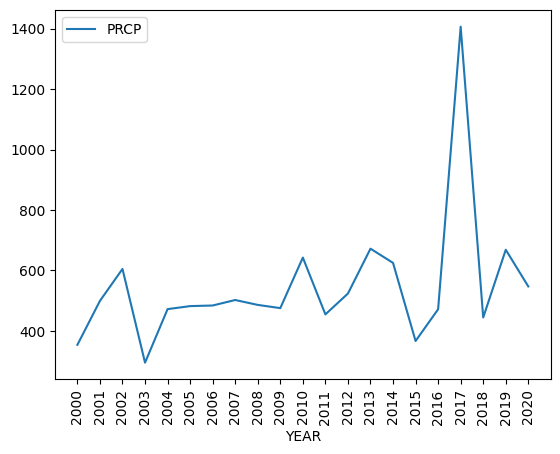

In [1]:
import pandas as pd  # Import knihovny pandas pro práci s datovými rámci

# Načtení datového souboru CSV z URL s určením delimiteru
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', delimiter=';')

# Převedení sloupce DATE na typ datetime pro lepší práci s daty
df['DATE'] = pd.to_datetime(df['DATE'])
# Vytvoření nového sloupce YEAR získáním roku z datetime sloupce DATE
df['YEAR'] = df['DATE'].dt.year
# Agregace dat podle sloupce YEAR a NAME s výpočtem sumy hodnot v sloupci PRCP, reset indexu pro výsledný DataFrame
df_agregovano = df.groupby(['YEAR', 'NAME']).agg({'PRCP': 'sum'}).reset_index()
# Filtrace výsledného DataFrame pro lokality s názvem 'RUZYNE'
df_agregovano = df_agregovano[df_agregovano['NAME'] == 'RUZYNE']

# Vytvoření grafu s osou x jako YEAR, osou y jako PRCP, nastavení značek osy x na jednotlivé roky a rotace popisků na osi x o 90 stupňů
df_agregovano.plot(x='YEAR', y='PRCP', xticks=df_agregovano['YEAR'], rot=90)


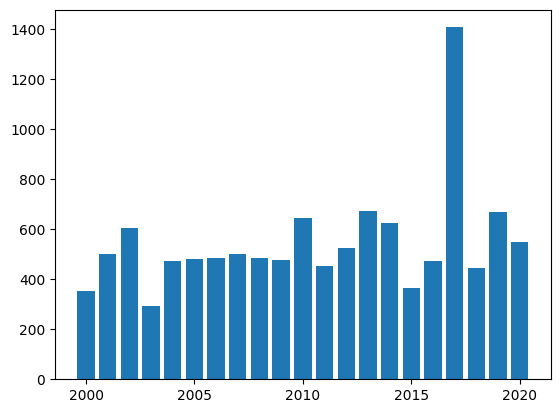

In [2]:
import pandas as pd  # Import knihovny pandas pro práci s datovými rámci
from matplotlib import pyplot as plt  # Import knihovny pyplot z matplotlib pro tvorbu grafů

# Načtení datového souboru CSV z URL s určením delimiteru
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', delimiter=';')

# Převedení sloupce DATE na typ datetime pro lepší manipulaci s datovými řadami
df['DATE'] = pd.to_datetime(df['DATE'])
# Vytvoření nového sloupce YEAR získáním roku z datetime hodnoty sloupce DATE
df['YEAR'] = df['DATE'].dt.year

# Agregace dat podle sloupce YEAR a NAME, součet hodnot v sloupci PRCP, reset indexu pro čistý DataFrame
df_agregovano = df.groupby(['YEAR', 'NAME']).agg({'PRCP': 'sum'}).reset_index()
# Filtrace výsledného DataFrame pro lokality s názvem 'RUZYNE'
df_agregovano = df_agregovano[df_agregovano['NAME'] == 'RUZYNE']

# Vytvoření sloupcového grafu s osou x jako YEAR a osou y jako PRCP
plt.bar(df_agregovano['YEAR'], df_agregovano['PRCP'])
plt.show()  # Zobrazení grafu


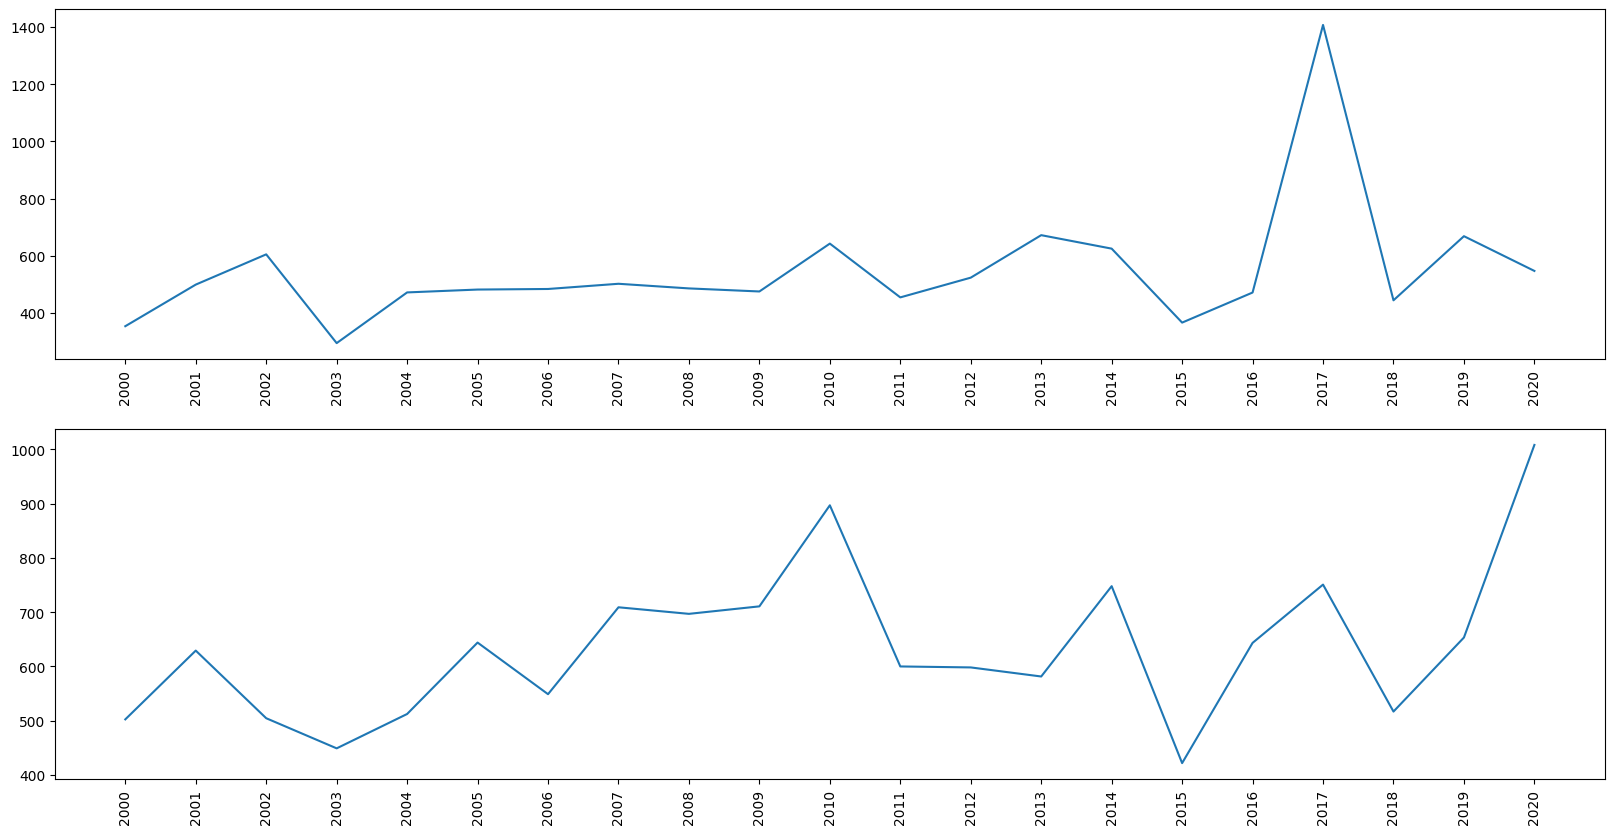

In [4]:
import pandas as pd  # Import knihovny pandas pro práci s datovými rámci
from matplotlib import pyplot as plt  # Import knihovny pyplot z matplotlib pro tvorbu grafů

# Načtení datového souboru CSV z URL s určením delimiteru
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', delimiter=';')

# Inicializace figure a axes objektů pro vytvoření dvou grafů (2 řádky, 1 sloupec)
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

# Převedení sloupce DATE na typ datetime pro lepší manipulaci s datovými řadami
df['DATE'] = pd.to_datetime(df['DATE'])
# Vytvoření nového sloupce YEAR získáním roku z datetime hodnoty sloupce DATE
df['YEAR'] = df['DATE'].dt.year

# Agregace dat podle sloupce YEAR a NAME, součet hodnot v sloupci PRCP, reset indexu pro čistý DataFrame
df_agregovano = df.groupby(['YEAR', 'NAME']).agg({'PRCP': 'sum'}).reset_index()
# Filtrace výsledného DataFrame pro lokality s názvem 'RUZYNE'
df_agregovano_ruzyne = df_agregovano[df_agregovano['NAME'] == 'RUZYNE']
# Filtrace výsledného DataFrame pro lokality s názvem 'MOSNOV'
df_agregovano_mosnov = df_agregovano[df_agregovano['NAME'] == 'MOSNOV']

# Vytvoření čárového grafu pro lokality 'RUZYNE' v prvním subplotu
ax[0].plot(df_agregovano_ruzyne['YEAR'], df_agregovano_ruzyne['PRCP'])
# Nastavení značek a popisků osy x pro první graf
ax[0].set_xticks(df_agregovano_ruzyne['YEAR'])
ax[0].set_xticklabels(df_agregovano_ruzyne['YEAR'], rotation=90)

# Vytvoření čárového grafu pro lokality 'MOSNOV' v druhém subplotu
ax[1].plot(df_agregovano_mosnov['YEAR'], df_agregovano_mosnov['PRCP'])
# Nastavení značek a popisků osy x pro druhý graf
ax[1].set_xticks(df_agregovano_mosnov['YEAR'])
ax[1].set_xticklabels(df_agregovano_mosnov['YEAR'], rotation=90)

plt.show()  # Zobrazení obou grafů


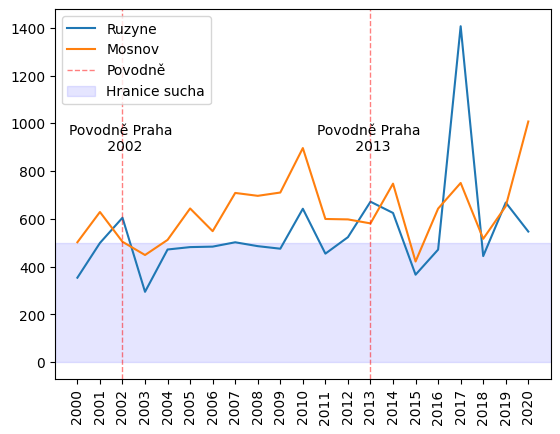

In [6]:
import pandas as pd  # Import knihovny pandas pro práci s datovými rámci
from matplotlib import pyplot as plt  # Import knihovny pyplot z matplotlib pro tvorbu grafů

# Načtení datového souboru CSV z URL s určením delimiteru
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', delimiter=';')

# Převedení sloupce DATE na typ datetime pro lepší manipulaci s datovými řadami
df['DATE'] = pd.to_datetime(df['DATE'])
# Vytvoření nového sloupce YEAR získáním roku z datetime hodnoty sloupce DATE
df['YEAR'] = df['DATE'].dt.year

# Agregace dat podle sloupce YEAR a NAME, součet hodnot v sloupci PRCP, reset indexu pro čistý DataFrame
df_agregovano = df.groupby(['YEAR', 'NAME']).agg({'PRCP': 'sum'}).reset_index()
# Filtrace výsledného DataFrame pro lokality s názvem 'RUZYNE'
df_agregovano_ruzyne = df_agregovano[df_agregovano['NAME'] == 'RUZYNE']
# Filtrace výsledného DataFrame pro lokality s názvem 'MOSNOV'
df_agregovano_mosnov = df_agregovano[df_agregovano['NAME'] == 'MOSNOV']

# Vytvoření čárových grafů pro obě lokality s popiskem
plt.plot(df_agregovano_ruzyne['YEAR'], df_agregovano_ruzyne['PRCP'], label='Ruzyne')
plt.plot(df_agregovano_mosnov['YEAR'], df_agregovano_mosnov['PRCP'], label='Mosnov')

# Nastavení značek a popisků osy x
plt.xticks(df_agregovano_ruzyne['YEAR'], rotation=90)

# Přidání vertikálních čar pro zvýraznění let povodní s popiskem u první čáry
label_added = False
for rok in (2002, 2013):
    if not label_added:
        plt.axvline(rok, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Povodně')
        label_added = True
    else:
        plt.axvline(rok, color='red', linestyle='--', linewidth=1, alpha=0.5)
    plt.text(rok, 1000, f'Povodně Praha \n {rok}', verticalalignment='top', horizontalalignment='center')

# Přidání horizontální oblasti pro zvýraznění "Hranice sucha" s popiskem
plt.axhspan(0, 500, alpha=0.1, color='blue', label='Hranice sucha')

# Přidání legendy a zobrazení grafu
plt.legend()
plt.show()


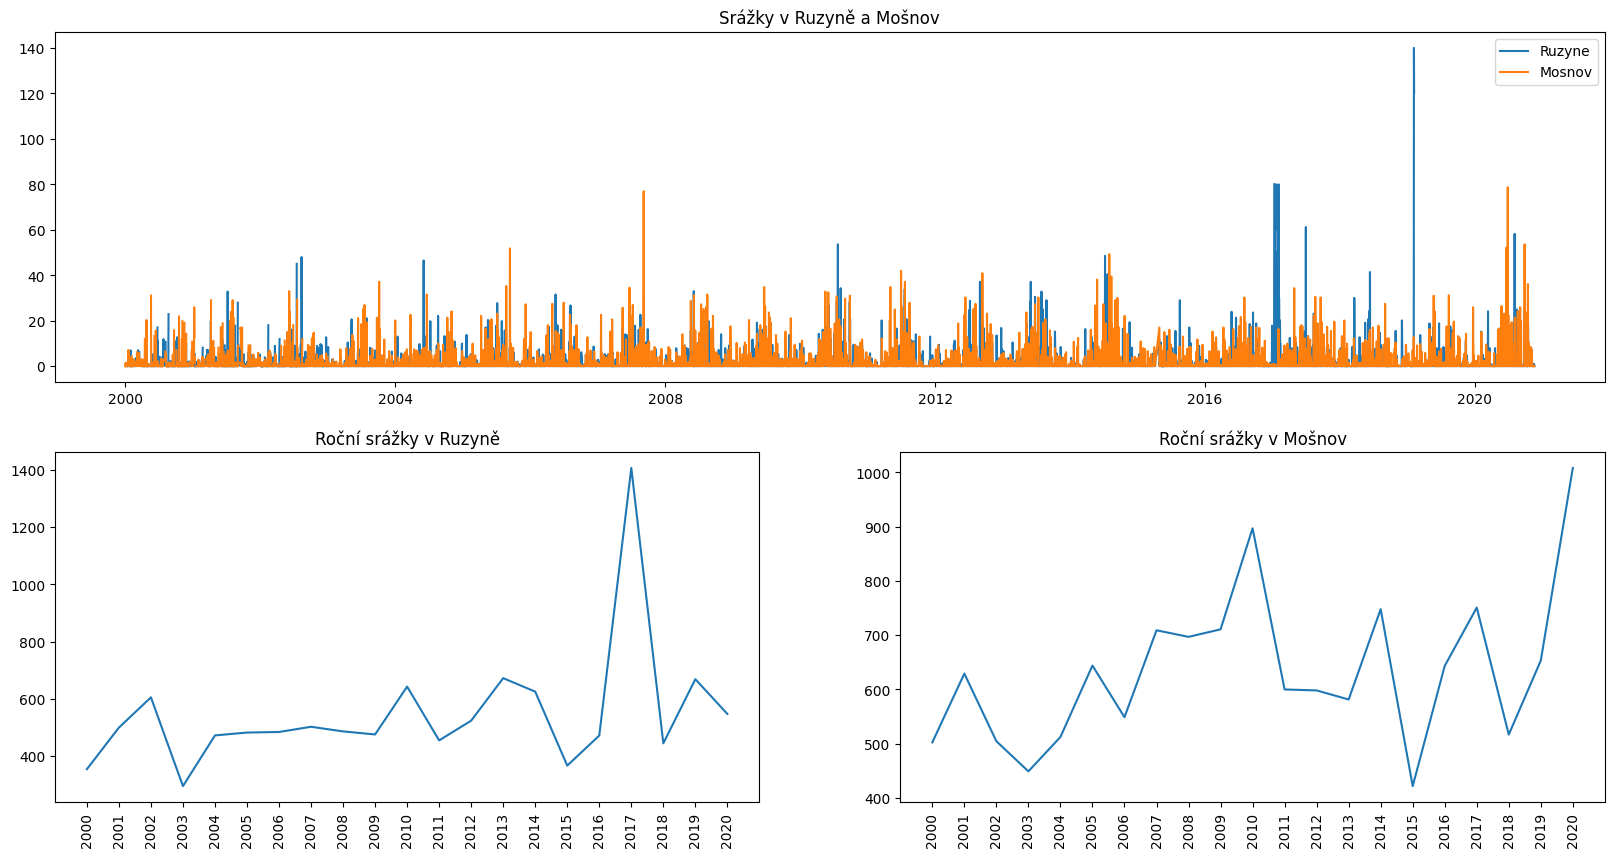

In [7]:
import pandas as pd  # Import knihovny pandas pro práci s datovými rámci
from matplotlib import pyplot as plt  # Import knihovny pyplot z matplotlib pro tvorbu grafů

fig = plt.figure(figsize=(20, 10))  # Inicializace figure s nastavením velikosti

# Načtení datového souboru CSV z URL s určením delimiteru
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', delimiter=';')

# Převedení sloupce DATE na typ datetime pro lepší manipulaci s datovými řadami
df['DATE'] = pd.to_datetime(df['DATE'])
# Vytvoření nového sloupce YEAR získáním roku z datetime hodnoty sloupce DATE
df['YEAR'] = df['DATE'].dt.year

# Definice grid layoutu pro subploty
grid = (2, 2)

# Vytvoření jednotlivých subplotů s určením jejich pozic a rozsahu
graf1 = plt.subplot2grid(grid, (0, 0), rowspan=1, colspan=2)
graf2 = plt.subplot2grid(grid, (1, 0), rowspan=1, colspan=1)
graf3 = plt.subplot2grid(grid, (1, 1), rowspan=1, colspan=1)

# Filtrace dat pro lokality Ruzyne a Mosnov
df_ruzyne = df[df['NAME'] == 'RUZYNE']
df_mosnov = df[df['NAME'] == 'MOSNOV']

# Agregace dat podle sloupce YEAR a NAME, součet hodnot v sloupci PRCP, reset indexu pro čistý DataFrame
df_agregovano = df.groupby(['YEAR', 'NAME']).agg({'PRCP': 'sum'}).reset_index()
df_agregovano_ruzyne = df_agregovano[df_agregovano['NAME'] == 'RUZYNE']
df_agregovano_mosnov = df_agregovano[df_agregovano['NAME'] == 'MOSNOV']

# Plotování dat pro Ruzyne a Mosnov na prvním grafu
graf1.plot(df_ruzyne['DATE'], df_ruzyne['PRCP'], label='Ruzyne')
graf1.plot(df_mosnov['DATE'], df_mosnov['PRCP'], label='Mosnov')
graf1.legend()  # Přidání legendy
graf1.set_title('Srážky v Ruzyně a Mošnov')  # Nastavení titulku grafu

# Plotování agregovaných ročních srážek pro Ruzyne na druhém grafu
graf2.plot(df_agregovano_ruzyne['YEAR'], df_agregovano_ruzyne['PRCP'], label='Ruzyne')
graf2.set_xticks(df_agregovano_ruzyne['YEAR'])  # Nastavení značek osy X
graf2.set_xticklabels(df_agregovano_ruzyne['YEAR'], rotation=90)  # Nastavení popisků osy X s rotací
graf2.set_title('Roční srážky v Ruzyně')  # Nastavení titulku grafu

# Plotování agregovaných ročních srážek pro Mosnov na třetím grafu
graf3.plot(df_agregovano_mosnov['YEAR'], df_agregovano_mosnov['PRCP'], label='Mosnov')
graf3.set_xticks(df_agregovano_mosnov['YEAR'])  # Nastavení značek osy X
graf3.set_xticklabels(df_agregovano_mosnov['YEAR'], rotation=90)  # Nastavení popisků osy X s rotací
graf3.set_title('Roční srážky v Mošnov')  # Nastavení titulku grafu

plt.show()  # Zobrazení všech grafů


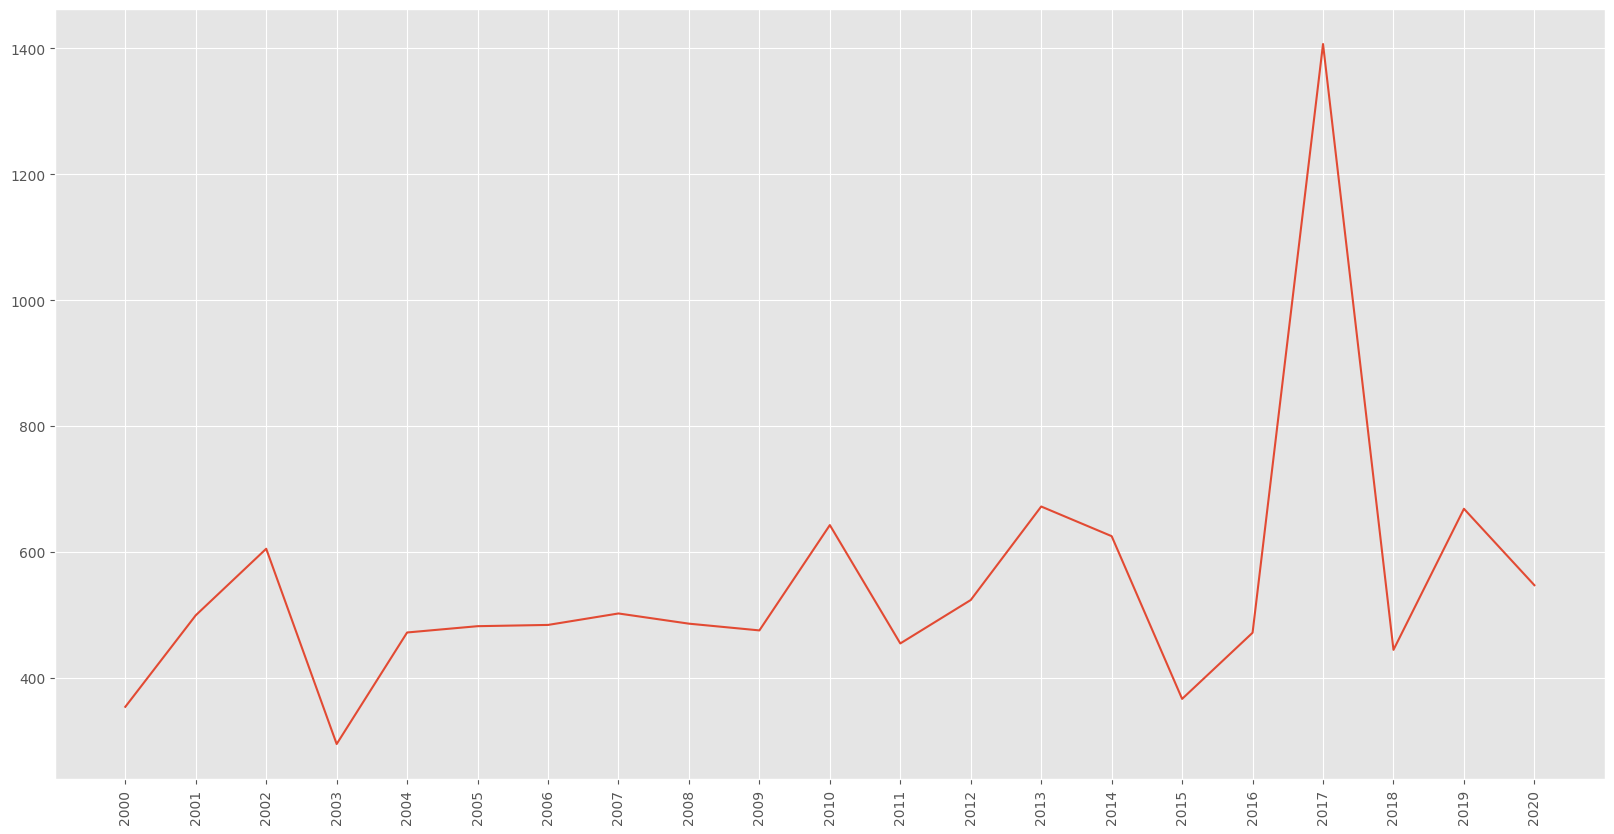

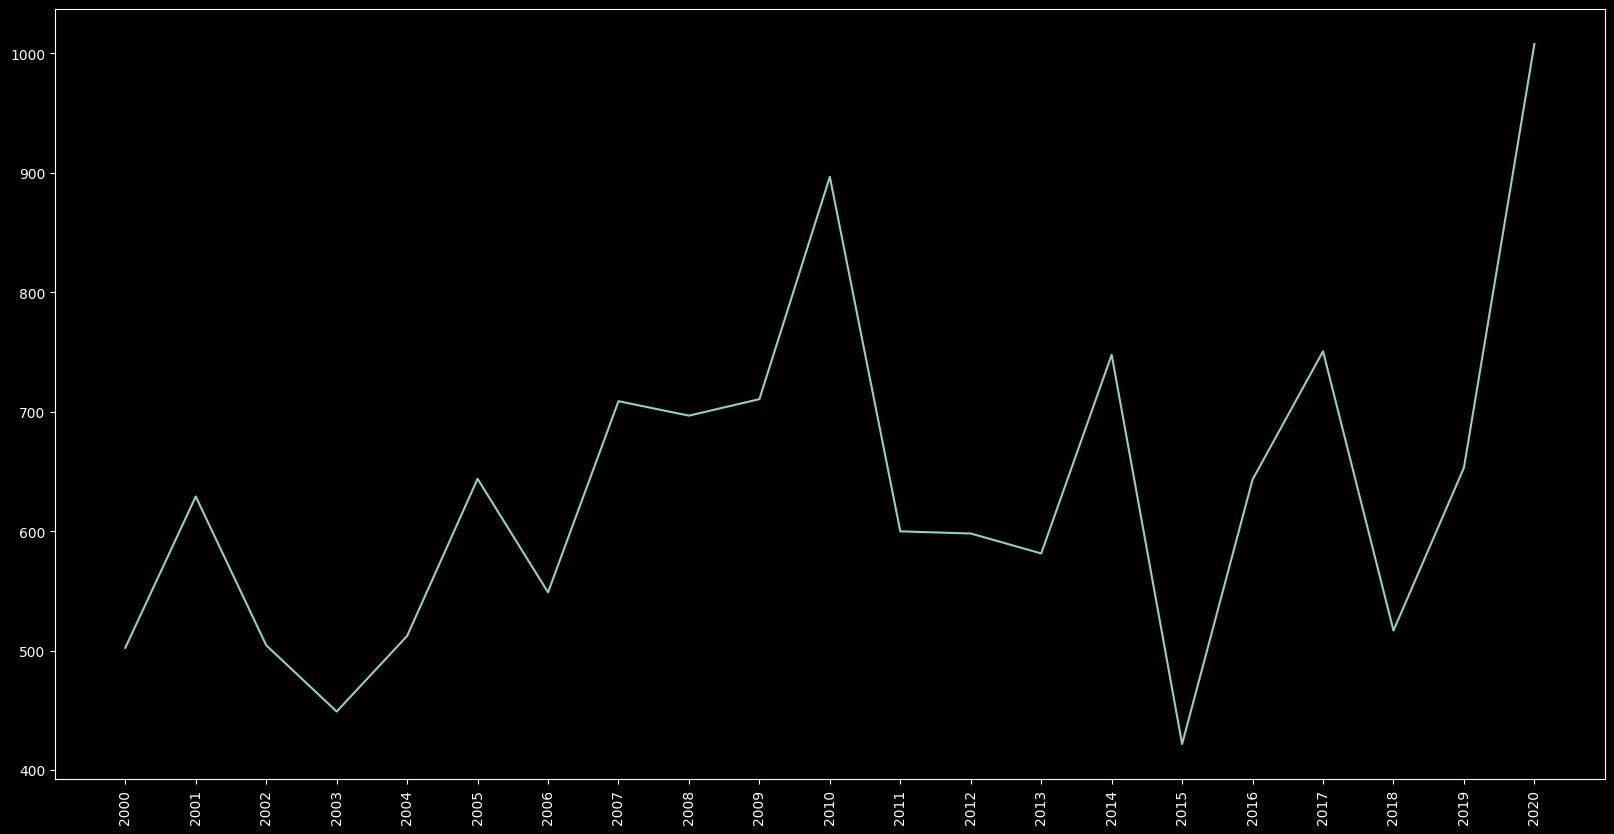

In [8]:
import pandas as pd  # Import knihovny pandas pro práci s datovými rámci
from matplotlib import pyplot as plt  # Import knihovny pyplot z matplotlib pro tvorbu grafů

# Načtení datového souboru CSV z URL s určením delimiteru
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv', delimiter=';')

# Převedení sloupce DATE na typ datetime pro lepší manipulaci s datovými řadami
df['DATE'] = pd.to_datetime(df['DATE'])
# Vytvoření nového sloupce YEAR získáním roku z datetime hodnoty sloupce DATE
df['YEAR'] = df['DATE'].dt.year

# Agregace dat podle sloupce YEAR a NAME, součet hodnot v sloupci PRCP, reset indexu pro čistý DataFrame
df_agregovano = df.groupby(['YEAR', 'NAME']).agg({'PRCP': 'sum'}).reset_index()
# Filtrace výsledného DataFrame pro lokality s názvem 'RUZYNE'
df_agregovano_ruzyne = df_agregovano[df_agregovano['NAME'] == 'RUZYNE']
# Filtrace výsledného DataFrame pro lokality s názvem 'MOSNOV'
df_agregovano_mosnov = df_agregovano[df_agregovano['NAME'] == 'MOSNOV']

# Použití stylu 'ggplot' pro první graf
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(20, 10))  # Nastavení velikosti obrázku
    plt.plot(df_agregovano_ruzyne['YEAR'], df_agregovano_ruzyne['PRCP'], label='Ruzyne')  # Vytvoření grafu pro Ruzyne
    plt.xticks(df_agregovano_ruzyne['YEAR'], rotation=90)  # Nastavení značek osy x

# Použití stylu 'dark_background' pro druhý graf
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20, 10))  # Nastavení velikosti obrázku
    plt.plot(df_agregovano_mosnov['YEAR'], df_agregovano_mosnov['PRCP'], label='Mosnov')  # Vytvoření grafu pro Mosnov
    plt.xticks(df_agregovano_mosnov['YEAR'], rotation=90)  # Nastavení značek osy x

plt.show()  # Zobrazení grafů
